## 什么是门特卡洛模拟（Monte Carlo  Simulation）
## 如何用门特卡洛方法解决21点游戏（BlackJack）

”monte carlo simulation“ 是一个赌场名字，人类研究概率、策略，研究的最密集，最intensive、最持续、醉倒的一个领域就是**赌博** -> 和钱直接相关。

#### 不同的地区，其实有些大小是有争执，有偏向的。

#### 有的地区，拖拉机（顺子），有的地区是清一色大

#### 一定要搞清楚一件事情，到底哪种手牌应该赢。概率越低的，越应该赢；

#### 3张牌的情况，就挺麻烦。数学概率论的方法。德州扑克，5张；

#### 特别复杂的时候，到底谁该赢？

解决两个问题：
1. 到底哪一幅手牌应该大一些；
2. 加入我们有一个赌场，3个区域，随机发三张牌，A：清一色，B：拖拉机，C：都不是；
    + 参与一次游戏，上注10块钱；
    + 押中了C：给你2元；
    + 押中A，押中B，分别得给多少钱，这个游戏才”公平“，持续有人来玩，庄家也可以赚到钱。


### 30分钟有两个重要目的： 
#### 1. RL中，遇到新问题的时候，如果没有模拟环境，我们是需要手动的自己创造一个模拟环境；
#### 2. RL的编程中，对代码能力要求比较高，接下来的编程任务，也可以提高大家的编程能力。（里边的很多代码，值得大家反复的学习）

#### => 掌握一种思路，就是通过随机模拟的方式来解决问题。通过随机模拟来解决问题，是计算机领域一个特有的方法，计算机和应用数学有什么区别？利用计算机随机模拟解决问题，就是一个重要特点。

In [1]:
#numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']
numbers = '23456789TJQKA'
colors = '红黑方梅'
attribute = 'XYZ'

## 除了0和1，不要出现别的数字，magic number

In [2]:
from itertools import product

In [3]:
one_suite_cards = [
    c+n for c, n in product(numbers, colors)
]

In [9]:
len(one_suite_cards)

52

In [26]:
jokers = 'Jk JK'.split()

```
A 2 3 => 1, 2, 3
JKQ => 12, 13, 14
```

In [4]:
def number_value(n): 
    position_v = numbers.find(n) + 2
    
    if n == 'A': 
        return position_v, 1
    else:
        return position_v,

In [5]:
import random

In [6]:
random.shuffle(one_suite_cards)

In [15]:
def distribute_hand(people_n):
    card_n = 3
    
    one_suite_cards = [
        c + n for c, n in product(numbers, colors)
    ]
    
    random.shuffle(one_suite_cards)
    
    random_hand = [one_suite_cards[i:i+card_n] for i in range(0, people_n*card_n, card_n)]
    
    return random_hand

In [16]:
distribute_hand(people_n=3)

[['A方', 'A黑', '7方'], ['8方', 'J黑', '2黑'], ['2梅', 'K方', 'T红']]

In [17]:
def is_flush(hand): #同花
    return len(set(c for _, c in hand)) == 1

def asc(numbers): 
    numbers = sorted(numbers)
    return numbers[2] - numbers[1] == numbers[1]- numbers[0] == 1

def is_straight(hand): # 拖拉机
    sorted_n = sorted(hand)
    
    possible_numbers = [number_value(n) for n, _ in hand]

    all_combination = list(product(*possible_numbers))
    
    return any(asc(h) for h in all_combination)

In [18]:
is_straight(['5红', '3红', '4梅'])

True

In [19]:
from collections import Counter

In [25]:
FLUSH, STRIGHT = 'flush', 'straight'

In [26]:
def get_poker_env(people, round_number=10000):
    poker_conter = Counter()
    total_hand = 0
    for t in range(round_number):
        for hand in distribute_hand(people_n=people):
            total_hand += 1
            if is_flush(hand): 
                poker_conter[FLUSH] += 1
            elif is_straight(hand):
                poker_conter[STRIGHT] += 1
    return poker_conter

In [27]:
from tqdm import tqdm_notebook

In [28]:
people_numbers = range(2, 17)
r = 50000
rates = []
for n in tqdm_notebook(people_numbers):
    result = get_poker_env(n, r)
    rates.append(result[FLUSH] / result[STRIGHT])

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/15 [00:00<?, ?it/s]

In [29]:
import matplotlib.pyplot as plt

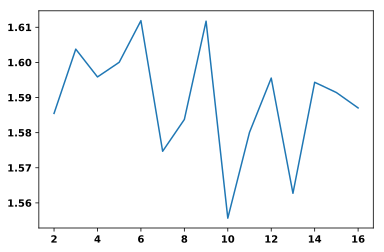

In [30]:
plt.plot(people_numbers, rates)

In [78]:
random.shuffle(one_suite_cards)

#庄家

In [79]:
one_suite_cards[:2]

['7红', '2梅']

A既可以做1也可以做11，默认值是11，当且仅当做11会爆炸的时候，就是1

In [80]:
one_suite_cards[2:4]

['6方', '3方']

In [81]:
one_suite_cards[5]

'8梅'

In [82]:
6 + 3 + 8

17

In [83]:
one_suite_cards[6]

'K黑'

In [85]:
7 + 2 + 10

19

In [86]:
one_suite_cards[7]

'2黑'

In [88]:
one_suite_cards[8]

'8方'

## 赌盘上玩一次的筹码是10元；
## 趣味思考题：1. 如果押中了“什么都没有”，奖励2块钱，请问押中FLUSH，押中STRIGHT，应该给多少钱？ 
## 1. 假设FLUSH为15元，SRAIGTH为60元，问一直开下去，是顾客吃亏，还是庄家吃亏；
## 2. 假设FLUSH为20元，SRAIGTH为40元，问一直开下去，是顾客吃亏，还是庄家吃亏；

## 思考一下？

## 总结：
### 1st  什么是门特卡洛模仿
### 2nd 模拟环境（扑克牌、发牌的模拟环境）做别的游戏，这些代码都可以复用；

## 术语 Terminology

#### Environment: 给你反馈、给你结果，运行不以agent的意志为改变的东西；
#### Agent：在这个环境做，进行观察，做选择的那个东西
#### Observation： Agent在环境中，能获得信息
#### State：一组来唯一描述Agent此时状态的编码信息。

## Homework: 
1. 整理课程代码，将它变成一个.py； 
2. 改变代码，增加大小王、大小王，大小王可以替代任何数字；
3. 将一手牌的个数，变为5个，计算在人数为10人的情况下，请分别求出以下扑克牌的概率：
    + straight_flush: 五張同花色的連續數字牌
    + Four of a kind: 其中四張是相同數字的撲克牌
    + Full house(葫蘆): 由三張相同數字及任何两张其他相同數字的撲克牌组成 (AAA+BB)
    + Flush: 此牌由五张不按顺序但相同花色的扑克牌组成
    + Straight: 此牌由五张連續數字扑克牌组成
    + Three of a kind: 三条
    + Two pair: 两对, 两对數字相同但两两不同的扑克和一张雜牌组成，共五張牌。
    + Pair: 对子, 由两张相同數字的扑克牌和另三张無法組成牌型的雜牌组成。
4. 在以上的概率求解中，有一个隐藏的“bug”，导致概率就算会有一些“轻微”的错误，请问个错误是什么？ 请修正它。
请思考蒙特卡洛方法求解问题和基于组合数学、概率率等方法的区别是什么？在计算机环境下使用有什么优势？

## 利用门特卡洛方法，做一个能智能博弈的21点AI

最原始的版本：玩家两个动作：hit, 加牌； stick：不要牌

In [1]:
import gymnasium as gym
env = gym.make('Blackjack-v1', natural=False, sab=False, render_mode='rgb_array')

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [103]:
env.reset()

((9, 2, False), {})

In [104]:
env.action_space

Discrete(2)

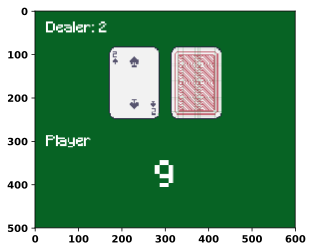

In [105]:
plt.imshow(env.render())

In [110]:
action = env.action_space.sample()

In [111]:
action

0

In [112]:
state, reward, terminated, trucated, info = env.step(action)

## 如果想自己做一个AI的话，希望AI识别什么是呢？ State
## 能不能让程序识别哪些State是好的State，哪些State是“差”的State
## -> 想给不同的State打个分，有个估计
## 不同的$Value(State)$， 这个State的Value
## $Value(State, Action)$, Q-Value, Quality 

In [3]:
from tqdm import tqdm_notebook

In [5]:
episode = 100000
state, info = env.reset() 

trajectories = []
win_or_loss = []

for _ in tqdm_notebook(range(episode)):
    
    trajectory = []
    
    while True:
        action = env.action_space.sample()  # agent policy that uses the observation and info
        next_state, reward, terminated, truncated, info = env.step(action)
        
        trajectory.append( (state, action, reward) )
        
        state = next_state
        
        if terminated or truncated:
            if reward > 0: 
                win_or_loss.append(1)
            else:
                win_or_loss.append(0)
                
            state, info = env.reset()
            trajectories.append(trajectory)
            
            break
env.close()

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/100000 [00:00<?, ?it/s]

In [6]:
sum(win_or_loss) / len(win_or_loss)

0.2814

## 我们怎么样获得这个状态的value呢？ 
## 如果我们能就1条trajectory，里边的state，我们估计出来的value，那么将很多个 trajectories，获得这些state，进行平均就行
## value = 从这个时间点之后，累积的reward等于多少。

In [119]:
trajectories[3]

[((19, 10, True), 1, 0.0), ((18, 10, False), 1, -1.0)]

In [155]:
import numpy as np

In [156]:
from collections import defaultdict

In [170]:
G = 0 
gamma = 0.9
value = defaultdict(list) # value[state]

for t in trajectories:
    visited = set()
    for (s, a, r) in t[::-1]:
        if s not in visited: # first-visit value
            G = r + gamma * G
            value[s].append(G)
            visited.add(s)

for s, g in value.items():
    value[s] = np.mean(g)

In [158]:
value

defaultdict(list,
            {(12, 4, False): -2.662137994804847,
             (20, 10, False): -2.774839671081755,
             (15, 10, False): -3.112557376389988,
             (20, 3, False): -2.7498649766524292,
             (12, 3, False): -2.849078503013338,
             (9, 10, False): -2.9146302712313976,
             (7, 9, False): -2.654292612986253,
             (7, 7, False): -2.860392128125698,
             (12, 10, False): -3.0371858792176276,
             (9, 9, False): -2.9736267935519307,
             (11, 4, False): -2.842994944556272,
             (16, 3, False): -3.016274260090086,
             (15, 9, False): -3.2723027698776432,
             (21, 10, False): -2.5313006446835966,
             (11, 10, False): -2.814952156604615,
             (20, 7, True): -1.9488601720265633,
             (15, 4, False): -2.8735093841614057,
             (21, 8, False): -2.6059518554392342,
             (18, 8, False): -2.94457714272148,
             (17, 8, False): -3.0434736230

In [171]:
value_with_ace = np.zeros((20+10, 11))
value_with_ace[:] = np.nan
value_without_ace = np.zeros((20+10, 11))
value_without_ace[:] = np.nan

In [172]:
for (p, d, a), v in value.items():
    if a: value_with_ace[p][d] = v
    else:
        value_without_ace[p][d] = v

In [173]:
s_value = plt.imshow(value_with_ace)
plt.xlabel('Dealer Show')
plt.ylabel('Player Sum')
plt.colorbar(s_value)

In [174]:
s_value = plt.imshow(value_without_ace)
plt.xlabel('Dealer Show')
plt.ylabel('Player Sum')
plt.colorbar(s_value)

<IPython.core.display.Javascript object>


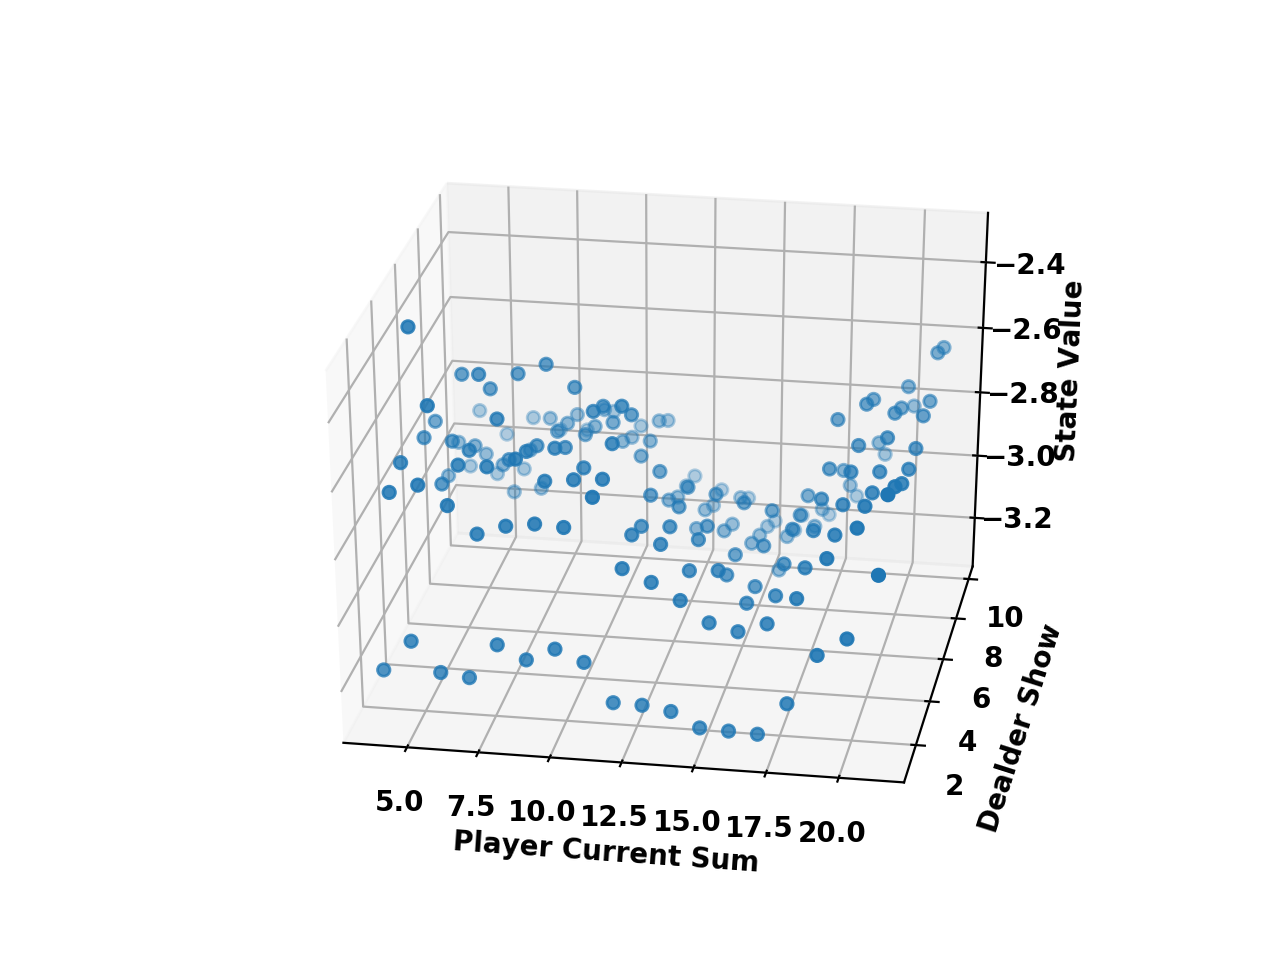

In [177]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.arange(value_with_ace.shape[0]), 
                   np.arange(value_without_ace.shape[1]))

def get_z(x, y, ace):
    data_source = value_with_ace if ace else value_without_ace
    return value_without_ace[x][y]

Z = np.array([get_z(x,y,ace=False) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

ax.scatter(X,Y,Z) 
#ax.plot_surface(X, Y, Z)
#ax.plot_wireframe(X, Y, Z)

ax.set_xlabel("Player Current Sum")
ax.set_ylabel("Dealder Show")
ax.set_zlabel("State Value")

plt.show()

## 用来MC的方法求解了value
## 如果获得action的policy $\pi$ 就很简单了
## $\pi(s) -> action $
## Table[state] = list() # len=|action|
## table[s] = [a1, a2, a3]
## Q-table[s] =  [a1, a2, a3]

In [8]:
from collections import defaultdict

In [10]:
import numpy as np

In [11]:
G = 0 
gamma = 0.9
value_with_action = defaultdict(list) # value[state]
Q_table = defaultdict(lambda : [0, 0])

for t in trajectories:
    visited = set()
    for (s, a, r) in t[::-1]:
        if s not in visited: # first-visit value
            G = r + gamma * G
            value_with_action[(s, a)].append(G)
            visited.add(s)

            
for (s, a), Vs in value_with_action.items():
    Q_table[s][a] = np.mean(Vs)

In [12]:
np.argmax([-11, -1])

1

In [13]:
def policy(state, episode=0.2): 
    
    global Q_table
    
    if random.random() < episode:
        return np.random.choice(range(len(Q_table[state])))
    else:
        return np.argmax(Q_table[state])

In [14]:
Q_table

defaultdict(<function __main__.<lambda>()>,
            {(15, 6, False): [-2.6672208262076094, -3.043758739061678],
             (13, 1, False): [-3.2309629568940674, -3.0881542317699515],
             (18, 9, False): [-2.6476304866365945, -3.229435079027964],
             (12, 9, False): [-3.1342295043498476, -3.0387880541371737],
             (7, 1, False): [-3.490556253673852, -2.88717858349435],
             (21, 3, False): [-1.6951251100181512, -3.594670784511627],
             (17, 3, False): [-2.6022455065683308, -3.197989320985093],
             (19, 10, False): [-2.56812231363041, -3.3594895380557155],
             (10, 10, False): [-3.048071689611145, -2.593064555892486],
             (17, 1, False): [-3.1729056509388416, -3.2807575366498956],
             (12, 10, False): [-3.1679752791129023, -2.980931345635177],
             (14, 10, False): [-3.2598736901861027, -3.049828842913976],
             (14, 5, False): [-2.72892089615044, -3.12601863833007],
             (12, 6, 

In [16]:
import random

In [19]:
episode = 20000
state, info = env.reset() 

trajectories = []
win_or_loss = []

for _ in tqdm_notebook(range(episode)):
    
    trajectory = []
    
    while True:
        action = policy(state, episode=0)  # agent policy that uses the observation and info
        next_state, reward, terminated, truncated, info = env.step(action)
        
        trajectory.append( (state, action, reward) )
        
        state = next_state
        
        if terminated or truncated:
            if reward > 0: 
                win_or_loss.append(1)
            else:
                win_or_loss.append(0)
                
            state, info = env.reset()
            trajectories.append(trajectory)
            
            break
env.close()

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/20000 [00:00<?, ?it/s]

## 我们已经获得了更好的Policy, $\pi(s)$

In [20]:
sum(win_or_loss) / len(win_or_loss)

0.4271

In [21]:
import pickle

In [23]:
help(pickle.dump)

Help on built-in function dump in module _pickle:

dump(obj, file, protocol=None, *, fix_imports=True)
    Write a pickled representation of obj to the open file object file.
    
    This is equivalent to ``Pickler(file, protocol).dump(obj)``, but may
    be more efficient.
    
    The optional *protocol* argument tells the pickler to use the given
    protocol supported protocols are 0, 1, 2, 3 and 4.  The default
    protocol is 3; a backward-incompatible protocol designed for Python 3.
    
    Specifying a negative protocol version selects the highest protocol
    version supported.  The higher the protocol used, the more recent the
    version of Python needed to read the pickle produced.
    
    The *file* argument must have a write() method that accepts a single
    bytes argument.  It can thus be a file object opened for binary
    writing, an io.BytesIO instance, or any other custom object that meets
    this interface.
    
    If *fix_imports* is True and protocol is less

In [28]:
with open('BlackJack-lecture-01.pkl', 'wb') as f:
    pickle.dump(dict(Q_table), f)

In [192]:
def distribute():
    random.shuffle(one_suite_cards)
    for c in one_suite_cards:
        yield c

## ZYG

In [194]:
#zyg-01

In [193]:
next(distribute())

'T梅'

In [195]:
#deal-01

In [196]:
next(distribute())

'9红'

In [197]:
# zyg-02
next(distribute())

'3红'

In [198]:
next(distribute())

'K梅'

# -1,  -1, -1, -1, +1, -1, -1, -1, -1, +1

In [246]:
def distribute():
    random.shuffle(one_suite_cards)
    for c in one_suite_cards:
        yield c

In [256]:
# lmy-03
next(distribute())

'J黑'

In [252]:
# lmy-01
next(distribute())

'5黑'

In [253]:
# lmy-02
next(distribute())

'2方'

In [254]:
# dealer-01
next(distribute())

'5红'

In [255]:
# dealer-02
next(distribute())

'T梅'

In [257]:
next(distribute())

'T红'

## Homework: 

0. 请整理、复现课程上的代码，将所有的代码封装成为一个单独的文件，该文件不是ipynb格式，是一个.py文件。该文件的输出为一个Q-Table的pickle数据；
1. 自己玩几把，然后自己的结果，再用你训练出来的AI，也来同样处理这个结果，观察你和AI的行为的区别；
2. 课程中的代码，是先收集了很多个sampling，然后再统一进行更新（off-line training)。将问题0中的程序改为：**一边sampling，一遍更新policy的方式**.(on-line training)，请观察最终的胜率，请思考，这种方式下，与训练完毕然后再进行policy的更新，有何区别？ （参考：RL-Introduction, Page.101)
3. 在问题2的基础上（on-line-leanring)，观察 mean-reward 随着episode数字的增加的变化趋势，产出结果为一张图；
4. 你认为还有哪些方式可以增加胜率和mean-rewards？
5. 请思考，强化学习与监督学习，非监督学习最大的区别是什么？ hint：强化学习与监督学习都需要预测一个结果，请问这两个的预测过程有何不同；强化学习与非监督学习都不需要人工标注label，请问这两个的区别又是什么？

### 如何提交作业?：
+ 作业提交的checklist：
    + 5张牌版”扎金花“的概率求解；
    + on-line learning版本的蒙特卡洛BlackJack策略更新；
    + mean-reward随着episode的变化趋势；
    + markdown / txt 文件对于Home-work 问题2， 4， 5 的回答；
> 请在github: https://github.com/computing-intelligence/RL-2023-Spring 下创建一个自己名字（汉语拼音）的文件夹，然后将这个作业的python文件及markdown/txt 传至（push）到文件夹